# My Año en Spotify - Tatiii's Challengue

> Una manera facil de ganar juguetes legos a una amiga.

Inspirado por [el post de Nerudista en Tacos de datos](https://tacosdedatos.com/dueno-de-mis-datos-spotify) y una manera facil de ganar muñecos legos a una amiga.

- toc: true 
- badges: true
- comments: true
- author: Stanley Salvatierra
- image: images/lego.png
- categories: [jupyter, spotify, python]

> twitter: https://twitter.com/martinRenou/status/1228229683285639168

Esto es una re-implementation del trabajo de [el post de Nerudista en Tacos de datos](https://tacosdedatos.com/dueno-de-mis-datos-spotify), tambien una manera de probarlo con mis datos de Spotify y ... `ganarle los legos del mes de Marzo a` `@MoonLover543`.


> twitter: https://twitter.com/MoonLover543/status/1233100050219311104


El procedimiento es el mismo explicado en el post original pero añado como bonus  el codigo para plotear los artistas que mas se escucha, esta al final del post.

<figure>
<center>
  <img src="https://www.dropbox.com/s/1pbfee0oohmupzh/IMG_20200301_233847.jpg?raw=true" width="200">
<figcaption>Lo que me todo del 1 de Marzo</figcaption></center>
</figure>





# Mi año en Spotify

Voy a bajar mis datos desde mi dropbox personal y luego hacerle `unzip` al archivo original

In [32]:
!wget https://www.dropbox.com/s/bxmstnwtvr2si0j/MyData.zip

--2020-03-02 03:51:39--  https://www.dropbox.com/s/bxmstnwtvr2si0j/MyData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bxmstnwtvr2si0j/MyData.zip [following]
--2020-03-02 03:51:39--  https://www.dropbox.com/s/raw/bxmstnwtvr2si0j/MyData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc80e318b3163cc5b576223c431.dl.dropboxusercontent.com/cd/0/inline/AzJZNKBZF5rTpwyodUajjpFlFyMwlMoJ8P5iDrYnCO4zkCaMejQqSI5JPBUFgSpv_D-TYL_e_0BSaq1UZNEOa2UK2zgj6yr2ujDfO2A9JosRtSMlBTJlOl2QykU78-cycr8/file# [following]
--2020-03-02 03:51:39--  https://ucc80e318b3163cc5b576223c431.dl.dropboxusercontent.com/cd/0/inline/AzJZNKBZF5rTpwyodUajjpFlFyMwlMoJ8P5iDrYnCO4zkCaMejQqSI5JPBUFgSpv_D-TYL_e_0BSaq1UZNEOa2UK2zgj6yr2ujDfO2A9JosRtSMlBTJlOl2Q

In [34]:
%ls
%rm -rf MyData

MyData/  MyData.zip  my_spotify_data.zip  sample_data/


In [35]:
%ls

MyData.zip  my_spotify_data.zip  sample_data/


In [36]:
# Descomprimiendo
!unzip MyData.zip 

Archive:  MyData.zip
   creating: MyData/
  inflating: MyData/StreamingHistory0.json  
  inflating: MyData/StreamingHistory1.json  
  inflating: MyData/StreamingHistory2.json  
  inflating: MyData/StreamingHistory3.json  
  inflating: MyData/StreamingHistory4.json  


In [37]:
# que hay dentro...

!head MyData/StreamingHistory0.json

[
  {
    "endTime" : "2018-12-14 16:29",
    "artistName" : "Ricardo Montaner",
    "trackName" : "Me va a extrañar (aka Unchain My Heart)",
    "msPlayed" : 275757
  },
  {
    "endTime" : "2019-02-27 22:46",
    "artistName" : "Sebastian Yatra",


In [0]:
# Algunos imports
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## Los datos  

Los archivos dentro de los archivos *json* mencionados anteriormente se ven más o menos así:  


```json
[
  {
    "endTime" : "2019-02-04 17:14",
    "artistName" : "MGMT",
    "trackName" : "Time to Pretend",
    "msPlayed" : 261000
  },
  {
    "endTime" : "2019-02-04 17:18",
    "artistName" : "MGMT",
"..." 
```  

En donde estos son los valores:  

 - `endTime`: Día y hora en los que finalizó la reproducción, en formato UTC (Tiempo Universal Coordinado).
 - `artistName`: Nombre del "creador" de cada elemento reproducido (por ejemplo, el nombre del artista de una canción).
 - `trackName`: Nombre de los elementos reproducidos o vistos (por ejemplo, título de una canción o nombre de un video). 
 - `msPlayed`: significa cuántos milisegundos se reprodujo una canción. 

Para leer estos datos en un DataFrame (que es como los vamos a ocupar más adelante) vamos a hacer uso de esta pequeña función:

In [9]:
%ls MyData/ 

 DuoNewFamily.json   Playlist1.json           StreamingHistory2.json
 FamilyPlan.json    'Read Me First.pdf'       StreamingHistory3.json
 Follow.json         SearchQueries.json       StreamingHistory4.json
 Inferences.json     StreamingHistory0.json   Userdata.json
 Payments.json       StreamingHistory1.json   YourLibrary.json


Nuestros datos estan dentro de la carpeta `MyData/`

In [10]:
from glob import glob
import json
import pandas as pd

# path donde estan el data

data_path = "./MyData/"


def read_history():
    history = []
    for file in sorted(glob(data_path + "/StreamingHistory*.json")):
        with open(file) as readable:
            history.extend(json.load(readable))
    history = pd.DataFrame(history)
    history["endTime"] = pd.to_datetime(history["endTime"])
    return history

streaming_history = read_history()
streaming_history.head(5)

,endTime,artistName,trackName,msPlayed
0,2018-12-14 16:29:00,Ricardo Montaner,Me va a extrañar (aka Unchain My Heart),275757
1,2019-02-27 22:46:00,Sebastian Yatra,Por Perro,246618
2,2019-02-27 23:56:00,Reyli Barba,¿Qué Nos Pasó? (with Yuridia),199701
3,2019-02-27 23:56:00,Artificial Intelligence (AI Podcast) with Lex ...,Tuomas Sandholm: Poker and Game Theory,5264
4,2019-02-27 23:56:00,Artificial Intelligence (AI Podcast) with Lex ...,"Juergen Schmidhuber: Godel Machines, Meta-Lear...",6086


## Histograma 

Siempre he sido fan de la forma en la que GitHub presenta las contribuciones que cada desarrollador hace en el sitio, y me parece que los datos obtenidos de Spotify, pero antes vamos a tener que modificar los datos un poco.

Como no nos interesa la hora en que cada canción terminó, primero vamos a deshacernos de la parte temporal de `endTime`:

In [0]:
streaming_history["date"] = streaming_history["endTime"].dt.floor('d')

Luego vamos a obtener un conteo de canciones por día con `groupby`:

In [0]:
by_date = streaming_history.groupby("date")[["trackName"]].count()
by_date = by_date.sort_index()

Para nuestra gráfica, necesitamos también saber a qué día de la semana y qué número de semana corresponde cada fecha, esto lo obtenemos con las propiedades `week` y `weekday`:

In [0]:
by_date["weekday"] = by_date.index.weekday
by_date["week"] = by_date.index.week

Y que al final dejará nuestro DataFrame viéndose así:

In [14]:
by_date.head()

,trackName,weekday,week
date,,,
2018-12-14,1,4,50
2019-02-27,4,2,9
2019-02-28,211,3,9
2019-03-01,120,4,9
2019-03-02,16,5,9


Hasta el momento ya tenemos casi todo, lo que falta es obtener números continuos para la semana, es decir, en el frame de arriba la semana 6 de 2019 debe ser la semana 0, la semana 7 debe ser la semana 1... a mi no se me ocurre otra manera de hacerlo más que con un ciclo `for`:

In [15]:
week = 0
prev_week = by_date.iloc[0]["week"]
continuous_week = np.zeros(len(by_date)).astype(int)
sunday_dates = []
for i, (_, row) in enumerate(by_date.iterrows()):
    if row["week"] != prev_week:
        week += 1
        prev_week = row["week"]
    continuous_week[i] = week
by_date["continuous_week"] = continuous_week 
by_date.head()

,trackName,weekday,week,continuous_week
date,,,,
2018-12-14,1,4,50,0
2019-02-27,4,2,9,1
2019-02-28,211,3,9,1
2019-03-01,120,4,9,1
2019-03-02,16,5,9,1


El siguiente paso es preparar, con NumPy, una matriz de tamaño `días ✕ semanas` en donde cada una de las entradas será la cantidad de canciones que escuchamos en ese día, de esa semana:

In [0]:
songs = np.full((7, continuous_week.max()+1), np.nan)

for index, row in by_date.iterrows():
    songs[row["weekday"]][row["continuous_week"]] = row["trackName"]

Ahora, simplemente podríamos graficar el la matriz `songs`, sin embargo el resultado no es tan agradable:

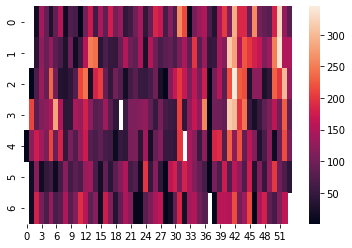

In [17]:
sns.heatmap(songs)

Lo que podemos hacer para mejorarlo requiere de un poco más de código. Lo primero es limpiar un poco las etiquetas de los ejes:

In [0]:
min_date = streaming_history["endTime"].min()
first_monday = min_date - timedelta(min_date.weekday())
mons = [first_monday + timedelta(weeks=wk) for wk in range(continuous_week.max())]
x_labels = [calendar.month_abbr[mons[0].month]]
x_labels.extend([
    calendar.month_abbr[mons[i].month] if mons[i-1].month != mons[i].month else "" 
    for i in range(1, len(mons))])

y_labels = ["Mon", "", "Wed", "", "Fri", "", "Sun"]

Definitivamente las etiquetas del eje de las X son mucho más complicado que las de Y, ya que no son continuas ni fijas, deben ser calculadas de acuerdo a los datos (si queres un poco más de explicación sobre el código, dime en [@io_exception](https://twitter.com/io_exception)).

Después vamos a hacer un poco de *grafimagia* con el tamaño de la gráfica, colores y los ejes. Y ya por último, usaremos el `heatmap` de *seaborn* con algunos cuantos argumentos que explicaré más adelante y desde luego, no olvides que hay que poner las etiquetas que tanto nos costó conseguir:


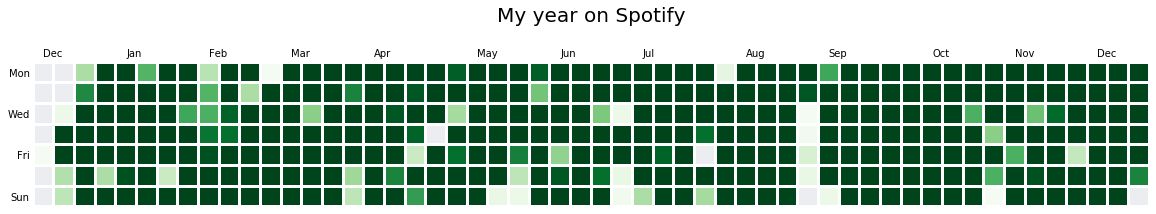

In [19]:
fig = plt.figure(figsize=(20,5))
ax = plt.subplot()

ax.set_title("My year on Spotify", fontsize=20,pad=40)
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both',length=0)
ax.set_facecolor("#ebedf0") 
fig.patch.set_facecolor('white')

sns.heatmap(songs, linewidths=2, linecolor='white', square=True,
            mask=np.isnan(songs), cmap="Greens",
            vmin=0, vmax=50, cbar=False, ax=ax)

ax.set_yticklabels(y_labels, rotation=0)
ax.set_xticklabels(x_labels, ha="left")
pass

Esto es escuchar música todos los dias.

Los argumentos:  

 - `songs`: nuestra matriz de `días ✕ semanas` con la cuenta de canciones por día,  
 - `linewidths`: el tamaño de la separación entre cada recuadro,  
 - `linecolor`: el color de la separación entre cada recuadro,  
 - `square`: le indica a la función que queremos que se respete la relación `1:1` en el tamaño de cada recuadro,  
 - `mask`: este es un argumento bastante interesante, ya que nos va a ayudar a "enmascarar" llos recuadros para los que no tenemos información. Lo establecemos a una matriz de valores booleanos (de tamaño `días ✕ semanas`), en donde cada `True` significa que no hay información para dicho día/semana
 - `cmap`: el *colormap* que se debe aplicar, curiosamente "Greens" coincide bastante con la coloración que usa GitHub,  
 - `vmin`: el valor que consideramos como el mínimo de entre todos nuestros valores,
 - `vmax`: el valor que consideramos máximo de entre todos nuestros valores, en mi caso considero que 100 canciones es el máximo, ¡a pesar de que mi récord es de 190 en un día!
 - `cbar`: valor *booleano* para indicar si queremos o no mostrar la barra de color que usualmente acompaña a el *heatmap*,
 - `ax`: el *axes* sobre el que se debe dibujar la gráfica.

Y *voilà*, nuestra gráfica está lista.

Ya quedará en ti modificar algunos aspectos de la gráfica, tal vez ponerle información acerca de la cantidad de canciones, habilitar la barra de color... otra gran idea sería hacer lo mismo pero en un framework como D3.js, pero eso ya queda para otro post. Por lo mientras, te invito a jugar con los datos en este Google Colab Notebook y a que me contactes [vía twitter en @io_exception](https://twitter.com/io_exception).

# BONUS 

## Artitas que mas escucho.

Adicionalmente tengo creada esta clase que me ayudara a plotear por frecuencia las veces que tengo escuchando a X artista.


Los datos que voy a utilizar son del dataframe `streaming_history`de arriba


In [20]:
streaming_history.head()

,endTime,artistName,trackName,msPlayed,date
0,2018-12-14 16:29:00,Ricardo Montaner,Me va a extrañar (aka Unchain My Heart),275757,2018-12-14
1,2019-02-27 22:46:00,Sebastian Yatra,Por Perro,246618,2019-02-27
2,2019-02-27 23:56:00,Reyli Barba,¿Qué Nos Pasó? (with Yuridia),199701,2019-02-27
3,2019-02-27 23:56:00,Artificial Intelligence (AI Podcast) with Lex ...,Tuomas Sandholm: Poker and Game Theory,5264,2019-02-27
4,2019-02-27 23:56:00,Artificial Intelligence (AI Podcast) with Lex ...,"Juergen Schmidhuber: Godel Machines, Meta-Lear...",6086,2019-02-27


In [22]:
streaming_history.shape

(40908, 5)

La columna de interes va ser `artistName`

0- Artista:  Río Roma    ||| Plays:  1310
1- Artista:  Reik    ||| Plays:  1258
2- Artista:  Prince Royce    ||| Plays:  1005
3- Artista:  Sebastian Yatra    ||| Plays:  696
4- Artista:  Maluma    ||| Plays:  539
5- Artista:  Daniel Santacruz    ||| Plays:  529
6- Artista:  Luciano Pereyra    ||| Plays:  504
7- Artista:  MYA    ||| Plays:  484
8- Artista:  Romeo Santos    ||| Plays:  471
9- Artista:  Piso 21    ||| Plays:  468
10- Artista:  Dani J    ||| Plays:  456
11- Artista:  CNCO    ||| Plays:  414
12- Artista:  Aventura    ||| Plays:  398
13- Artista:  Linkin Park    ||| Plays:  396
14- Artista:  Marc Anthony    ||| Plays:  369
15- Artista:  Américo    ||| Plays:  342
16- Artista:  Kewin Cosmos    ||| Plays:  331
17- Artista:  Los Angeles Azules    ||| Plays:  328
18- Artista:  Adolescent's Orquesta    ||| Plays:  302


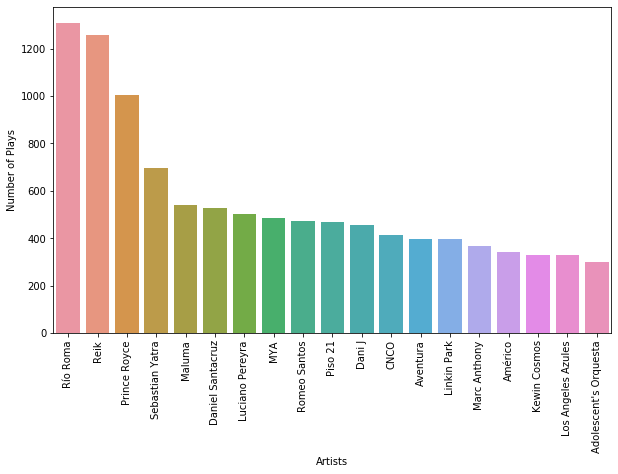

In [38]:
import seaborn as sns

class PlotCommenter:
    """
    Plot Top N words in a given column dataframe
    """
    def __init__(self, target_column="commenter"):
        self.target_column = target_column
    
    def get_sorted_tuits(self, counts, top_n=25):
        sorted_twitts =  sorted(counts.items(), key= lambda kv:(kv[1], kv[0]))[::-1][:top_n]
        
        for i, (k,v) in enumerate( sorted_twitts[1:]):
            print(str(i) + "-", "Artista: ", k, "   |||",  "Plays: ", v)
        return sorted_twitts
    
    def create_df_counts(self, sorted_twitts):
        
        df_x = pd.DataFrame(sorted_twitts, columns=["label", "count"])
        df_x["index"] = df_x.index

        df_x.index = list(df_x["label"])

        df_x = df_x.sort_values(['count'], ascending=False)

        return df_x
    
    
    def get_uniques_and_user_names(self, df):
        
        #user_names = df["commenter"].apply(self.deEmojify)
        user_names = df[self.target_column]
        #user_names = user_names.str.replace(" ", "")

        uniques = user_names.unique()
        return uniques, user_names
    
    def plot_word_count(self, df, titley='Number of Comments', titlex="Names", title="Message frec"):
        plt.figure(figsize=(10,6))
        ax = sns.barplot(x="index", y="count", data=df, order=df['index'])
        ax.set_xlabel(titlex)
        ax.set_ylabel(titley)
        ax.set_xticklabels(df['label'], rotation='vertical', fontsize=10)  
        
        #plt.savefig(self.data_path + "/" + title + ".png", format="png", bbox_inches = 'tight')
        
    def create_sorted_counts(self, user_names, top_n=25):
        
        # Count for N
        counts = self.get_counts(user_names)
        sorted_counts = self.get_sorted_tuits(counts, top_n = top_n)
        
        return sorted_counts
    
    
    def get_counts(self, user_names):
        
        counts = {}
        for u in user_names:
            counts[u] = []

        for u in user_names:
            counts[u].append(u)
        for k,v in counts.items():
            counts[k] = len(v)
            
        return counts
    
    def create_top_N_users(self, sorted_tuits, n=21):
            
        # Word Frecuency for N
        df_x = self.create_df_counts(sorted_tuits)
        
        # Plot For N
        topN = df_x.iloc[1:n]
        
        return topN
    
    def main(self, df, top_n = 21):
        
        self.uniques, self.user_names = self.get_uniques_and_user_names(df)
        self.sorted_counts = self.create_sorted_counts(self.user_names, top_n=top_n)
        top20 = self.create_top_N_users(self.sorted_counts, n=top_n)
            
        
        self.plot_word_count(top20, 
                             titley='Number of Plays',
                             titlex="Artists",
                             title="Message frec")
        
plot_top_commenter = PlotCommenter(target_column = "artistName")

plot_top_commenter.main(streaming_history, top_n = 20)

Es puro Pop al final ...

# TODO 
* Time Series for each artist